<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/Lec10(2025_6_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
x = c(0.1, 0.1, 0.15, 0.6, 0.8, 0.8, 1.2, 2.5, 3, 4,
4, 6, 10, 10, 12.5, 20, 20, 43, 43, 48,
48, 54, 74, 84, 94, 168, 263, 593)
d1 = data.frame(t = x, cens = rep(1, length(x)))
d0 = data.frame(t = rep(1370, 4128), cens = rep(0, 4128))
d = rbind(d1, d0)

In [3]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
loglikelihood = function(t, delta){
  function(par){
    sum(log(L_i(t, delta, par)))
  }
}
L_i = function(t, delta, par){
  mu = par[1]
  sigma = par[2]
  pu = par[3]
  (pu * dsev( (log(t)-mu)/sigma ) / ( sigma*t ) )^delta * (1 - pu * psev( (log(t)-mu)/sigma ) )^(1-delta)
}

In [4]:
res = optim(
  c(3, 2, .05),
  loglikelihood(d$t, d$cens),
  hessian=TRUE,
  control=list(fnscale=-1)
)

Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”
Warning message in log(L_i(t, delta, par)):
“NaNs produced”


In [5]:
hat.theta = res$par
H_n = res$hessian
fisher.information = -H_n
aVar = solve(fisher.information)

In [6]:
hat.theta

[1] 3.345008173 2.017241966 0.006748927

In [7]:
data.frame(
  lower = hat.theta[1] - qnorm(0.975)*sqrt(aVar[1,1]),
  upper = hat.theta[1] + qnorm(0.975)*sqrt(aVar[1,1])
)
# lower upper
# 2.548457 4.14156
data.frame(
  lower = hat.theta[2] - qnorm(0.975)*sqrt(aVar[2,2]),
  upper = hat.theta[2] + qnorm(0.975)*sqrt(aVar[2,2])
)
# lower upper
# 1.418893 2.615591
data.frame(
  lower = hat.theta[3] - qnorm(0.975)*sqrt(aVar[3,3]),
  upper = hat.theta[3] + qnorm(0.975)*sqrt(aVar[3,3])
)
# lower upper
# 0.004313218 0.009184637

lower,upper
<dbl>,<dbl>
2.548457,4.14156


lower,upper
<dbl>,<dbl>
1.418893,2.615591


lower,upper
<dbl>,<dbl>
0.004313218,0.009184637


In [13]:
mu = hat.theta[1]
sigma = hat.theta[2]
pu = hat.theta[3]
Gt = function(t, par){
  mu = par[1]
  sigma = par[2]
  pu = par[3]
  pu * psev( (log(t)-mu)/sigma )
}

t = seq(0, 1500, len=100)
hat.G = Gt(t, c(mu, sigma, pu))
Jacobian = function(t, mu, sigma, pu, h = 0.00001){
  j1 = (Gt(t, c(mu-h, sigma, pu)) - Gt(t, c(mu+h, sigma, pu)))/(2*h)
  j2 = (Gt(t, c(mu, sigma-h, pu)) - Gt(t, c(mu, sigma+h, pu)))/(2*h)
  j3 = (Gt(t, c(mu, sigma, pu-h)) - Gt(t, c(mu, sigma, pu+h)))/(2*h)
  matrix(c(j1, j2, j3), ncol=3)
}
J = Jacobian(t, mu, sigma, pu)
tJ = t(J)
var.G = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
var.G

[1] 0.000000e+00 6.859539e-07 8.837224e-07 1.009883e-06 1.099721e-06
  [6] 1.167114e-06 1.219381e-06 1.260924e-06 1.294594e-06 1.322329e-06
 [11] 1.345494e-06 1.365078e-06 1.381810e-06 1.396243e-06 1.408798e-06
 [16] 1.419804e-06 1.429517e-06 1.438143e-06 1.445847e-06 1.452762e-06
 [21] 1.459000e-06 1.464649e-06 1.469785e-06 1.474472e-06 1.478762e-06
 [26] 1.482700e-06 1.486326e-06 1.489672e-06 1.492767e-06 1.495636e-06
 [31] 1.498301e-06 1.500780e-06 1.503091e-06 1.505248e-06 1.507264e-06
 [36] 1.509152e-06 1.510921e-06 1.512581e-06 1.514140e-06 1.515606e-06
 [41] 1.516986e-06 1.518287e-06 1.519513e-06 1.520670e-06 1.521763e-06
 [46] 1.522795e-06 1.523772e-06 1.524697e-06 1.525573e-06 1.526403e-06
 [51] 1.527189e-06 1.527936e-06 1.528644e-06 1.529317e-06 1.529957e-06
 [56] 1.530565e-06 1.531143e-06 1.531693e-06 1.532216e-06 1.532715e-06
 [61] 1.533190e-06 1.533643e-06 1.534075e-06 1.534486e-06 1.534879e-06
 [66] 1.535254e-06 1.535612e-06 1.535954e-06 1.536280e-06 1.536593e-06
 [71] 1.536891e-06 1.537176e-06 1.537449e-06 1.537711e-06 1.537961e-06
 [76] 1.538200e-06 1.538429e-06 1.538649e-06 1.538859e-06 1.539061e-06
 [81] 1.539254e-06 1.539439e-06 1.539617e-06 1.539787e-06 1.539951e-06
 [86] 1.540108e-06 1.540259e-06 1.540403e-06 1.540542e-06 1.540676e-06
 [91] 1.540804e-06 1.540927e-06 1.541046e-06 1.541159e-06 1.541269e-06
 [96] 1.541374e-06 1.541476e-06 1.541573e-06 1.541667e-06 1.541757e-06

In [18]:
kaplan.meier = function(d){
  d$nj = rev(seq_along(d$t))
  d.obs = d %>% filter(cens==1)
  d.obs = d.obs %>%
    mutate(p = (1)/nj) %>%
    mutate(q = 1-p) %>%
    mutate(SF = cumprod(q)) %>%
    mutate(CDF = 1-SF)
  d.obs
}
km.d = kaplan.meier(d)

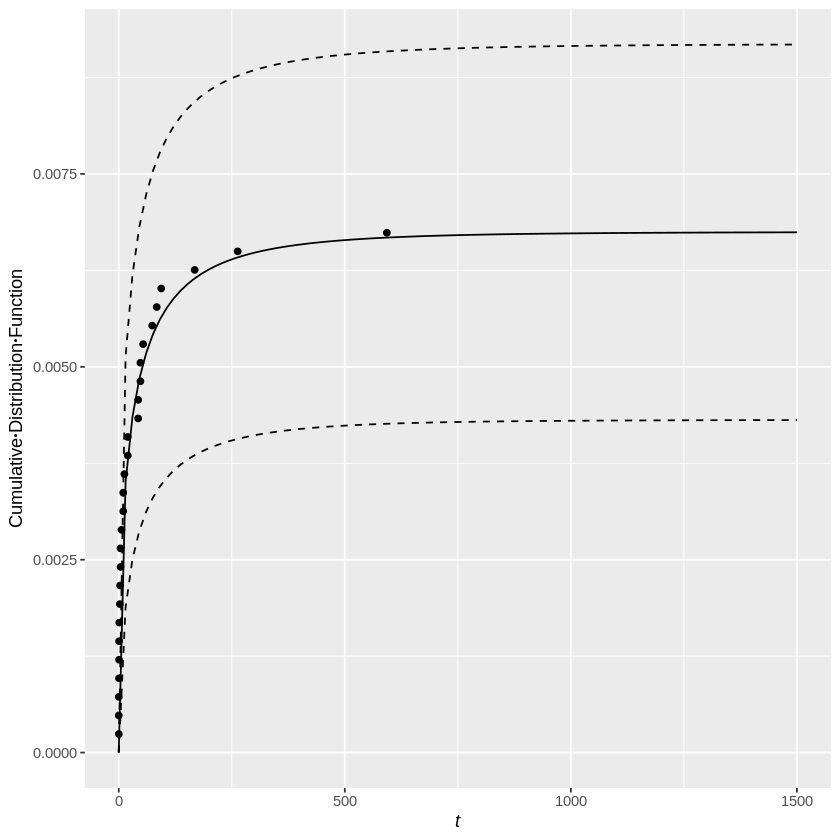

In [22]:
library(tidyverse)
dGT = data.frame(
  t,
  mean=hat.G,
  upper=hat.G+qnorm(0.975)*sqrt(var.G),
  lower=hat.G-qnorm(0.975)*sqrt(var.G))
dGT = dGT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
plot = dGT %>%
  ggplot()+
  geom_point(data = km.d, aes(t, CDF)) +
  geom_line(aes(t, mean))+
  geom_line(aes(t, upper), linetype=2)+
  geom_line(aes(t, lower), linetype=2)+
  xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")
plot